In [247]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# Hw 5: Sentiment Analysis on Scraped News Data 📰

Name: Mandar Brahmbhatt

Student ID: 511338

Collaborators:

## Instructions

For this homework, work through **Lab 5 (Sentiment Analysis on Movie Reviews)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, and a legend if it is applicable).

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will be taken into account during the grading and regrading process.

In [248]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Do not change the number of cells!** Your submission notebook should have exactly one code cell per problem. 
* Do **not** remove the `# your code here` line and add you solution after that line. 

### Some imports and configurations

In [249]:
!pip install beautifulsoup4 requests

In [250]:
import sys
import requests
from bs4 import BeautifulSoup
import re, string
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

In [251]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 1. Web Scraping

In this homework, we'll aquire data by scraping it from web pages. Fetching web pages, it turns out, is pretty easy; getting meaningful structured information out of them less so.

### HTML and the Parsing Thereof

Pages on the Web are written in HTML, in which text is (ideally) marked up into elements and their attributes:
```
<html>
  <head>
    <title>A web page</title>
  </head>
  <body>
    <p id="author">John Smith</p>
    <p id="subject">Data Science</p>
  </body>
</html>
```
In a perfect world, where all web pages are marked up semantically for our benefit, we would be able to extract data using rules like “find the `<p>` element whose id is author and return the text it contains.” In the actual world, HTML is not generally well-formed, let alone annotated. This means we’ll need help making sense of it.

To get data out of HTML, we will use the [BeautifulSoup library](http://www.crummy.com/software/BeautifulSoup/), which builds a tree out of the various elements on a web page and provides a simple interface for accessing them. We’ll also be using the [requests library](http://docs.python-requests.org/en/latest/), which is a much nicer way of making HTTP requests than anything that’s built into Python.

To use Beautiful Soup, we’ll need to pass some HTML into the BeautifulSoup() function. In our examples, this will be the result of a call to requests.get:
```
html = requests.get("http://www.example.com")
soup = BeautifulSoup(html.content, "html.parser")
```
after which we can get pretty far using a few simple methods.

We’ll typically work with Tag objects, which correspond to the tags representing the structure of an HTML page. For example, to find the first `<p>` tag (and extract its contents) you can use:
```
first_paragraph = soup.find('p').text
```
You can get multiple tags at once:
```
paragraphs = [p.text for p in soup.find_all('p')]
```
Frequently you’ll want to find tags with a specific class:
```
paragraphs = [p.text for p in soup.find_all('p', class_="example_class")]
```
will extract the text from each `<p>` tag with the class `example_class`. 

Just these handful of features will allow us to do quite a lot. If you end up needing to do more-complicated things (or if you’re just curious), check the [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#). Adapted from Joel Grus's [Data Science from Scratch](https://learning.oreilly.com/library/view/data-science-from/9781492041122/).

## 2. Get and Preprocess the Twitter Data

Your next few tasks are to implement the following three functions that will pull and clean the news article summaries scraped from the [Associated Press](https://apnews.com/). The last task will be conducting a sentiment analysis on the data that has been pulled! As a fair warning, scraped HTML data can be pretty messy; your results may not be nearly as clean as the movie dataset.

### Problem 2.1 

**Do this!** Complete the following function that will take an arbitrary search term and page number and return a list of article summaries.

1. Parse the HTML using Beautiful Soup.
2. Find the first `div` tag with class `SearchResultsModule-results`.
3. Find all the `div` elements nested within (2) with the class `PagePromo-description`. 

> **Hint**: Make sure it works before you continue. Look at the returned list, its length, and _some_ of its entries. **Best Practice**: Do not print out the entire list in the version of the notebook that you submit/deploy/share. 

In [252]:
def getResults(my_search_term, page=1):
    
    html = requests.get(f"https://apnews.com/search?q={my_search_term}&p={page}")
    soup = BeautifulSoup(html.content, "html.parser")
    
    results_div = soup.find("div", class_="SearchResultsModule-results")
    
    
    if results_div:
        results = [div.text for div in results_div.find_all("div", class_="PagePromo-description")]
    else:
        results = []
    
    # Don't worry about dates for now. We will use them in Problem 4.4
    dates = [div.find('bsp-timestamp')['data-timestamp'] for div in soup.find_all("div", class_="PagePromo-date")]
    
    return results, dates  

In [253]:
grader.check("q2a")

q2a results: All test cases passed!

In [353]:
my_search_term = "Juggling" # Replace this with your chosen search term! 

In [354]:
results, _ = getResults(my_search_term, 1)
results[0]

'\n        After ending last season with no healthy quarterbacks, the San Francisco 49ers are starting this season trying to juggle practice time for four of them.\n    '

### Problem 2.2

Now, we will need to process the article summaries. 

**Do this!** Complete the following function that processes _one_ article summary. 
* Use regex to remove special characters and punctuation.
* Convert everything to all lowercase. 
* Split the result into a list of words. 

Return this list of words as `processedResult`.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [355]:
def preProcess(result):
 
    processedResult = re.sub(r'[^\w ]', ' ', result).lower().split()
        
    return processedResult

In [356]:
preProcess(results[np.random.randint(0,30)])

['the',
 'eighth',
 'installment',
 'of',
 'the',
 'mission',
 'impossible',
 'franchise',
 'has',
 'been',
 'postponed',
 'a',
 'year',
 'signaling',
 'a',
 'new',
 'wave',
 'of',
 'release',
 'schedule',
 'juggling',
 'for',
 'hollywood',
 'studios',
 'as',
 'the',
 'actors',
 'strike',
 'surpasses',
 'three',
 'months',
 'of',
 'work',
 'stoppage']

In [357]:
grader.check("q2b")

q2b results: All test cases passed!

### Problem 2.3

Now, let's put it all together. Since we will only end up with 30 article summaries for each call of `getResults`,  we have to put the `getResults` and `preProcess` calls into a `while` loop. 

**Do this!** Complete the following function that will take in a search term then scrape and process the 100 article summaries which are most relevant to the given search term!

* Create a `while` loop that runs as long as the length of `processedResults` is under `100`. In the while loop:
    * Call the `getResults` function, passing in the `searchTerm` as well as a page number `page` to scrape.
    * Create a loop going through each `result` in the list of returned results from `getResults`. In that loop:
        * Run `preProcess` on each `result`, and append the returned list of words to `processedResults`. 
        * Make sure to break the inner loop once you have 100 processed results.
    * Don't forget to increment `page` inside of the `while` loop so that we return a new, unseen chunk of article summaries with each call to `getResults`.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [358]:
def searchTerm(my_search_term):
    
    processedResults = []
    allDates = []
    page = 1
    
    while len(processedResults) < 100:
        results, dates = getResults(my_search_term, page)
        
        if not results:
            break  
        
        for result in results:
            processed = preProcess(result)
            processedResults.append(processed)  
            
            if len(processedResults) >= 100:
                break  
        
        page += 1
    
        allDates += dates
    
    return processedResults, allDates[:100]

Select your search term to test the functions.
> **Hint**: Make sure this works before you continue. Look at the returned data, its type, length, and _some_ of its entries. **Best Practice**: Do not print out the entire data in the version of the notebook that you submit/deploy/share. 

In [359]:
data, dates = searchTerm(my_search_term) # feel free to go change this above!

In [360]:
grader.check("q2c")

q2c results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3. Analyzing News Data

Great! We now have all the data stored in our `data` variable. We can cycle through this data set and perform the same rule-based sentiment analysis that we saw previously in the lab.

### Problem 3.1

**Write up!** Let's create a hypothesis about the sentiment of our news articles.
* What would you guess the fraction of news articles with positive and negative emotions will be for your data/search term? Why?
* Write this up (_before_ you perform the sentiment analysis) in the form of a **hypothesis (Q1)**.


We will investigate how accurate this hypothesis was at the end of this section.

I would assume there would be more positive sentiment, as data science is an evolving field, through which new discoveries and patterns are being discovered. Typically, data science is used for positive causes, so I assume that there will more positive sentiment. However, I don't think there will be a lot more positive than negative, as data sciene is not inherently a positive or negative word.

<!-- END QUESTION -->

### Problem 3.2

**Do this!** Complete the following function that runs a rule-based sentiment analysis on _one_ given entry.
* Set the score to zero, then loop through each word in the entry
    * At each word, add one to the score if it is in `positive_words`, 
    * subtract one if it is in `negative_words`
    * or do nothing if it is in neither!
* Return `1` if the score is *not negative* and `-1` otherwise. 


 > **Hint**: We will declare `positive_words` and `negative_words` as `global` variables, so don't bother about passing those in as arguments. 

In [361]:
def analyzeSentiment(entry):
    sentiment_score = 0

    for review in entry:
        for word in re.sub(r'[^\w ]', ' ', review).lower().split():
            if word in positive_words:
                sentiment_score += 1
            if word in negative_words:
                sentiment_score -= 1
    if sentiment_score<0:
        sentiment_score = -1
    else:
        sentiment_score = 1 
    return sentiment_score  

Now, we can run all out tweets through this function and collect their sentiment. 

In [362]:
sentiments = []

global negative_words
global positive_words

with open('utility/data/negative-words.txt') as f:
    negative_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]

with open('utility/data/positive-words.txt') as f:
    positive_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]
    
for entry in data:
    sentiments.append(analyzeSentiment(entry))
sentiment_labels = np.array(sentiments)    
    
sentiment_labels

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1])

In [363]:
grader.check("q3b")

q3b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 4. Visualizing the Results

The final step is creating a few simple charts to look at the overall sentiment of the current search for news articles.

### Problem 4.1

**Do this!** Create a `bar` chart that visualizes the frequency of the positive and negative news articles in your dataset. Use appropriate axis labels, and include the search term (remember that you stored that in a variable earlier on) in your figure title. 

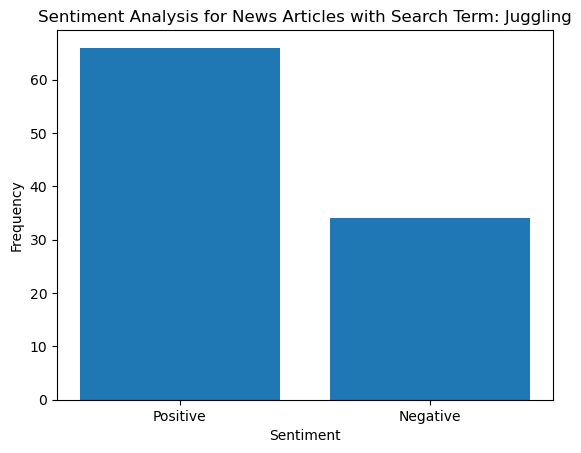

In [364]:
plt.rcdefaults() # Let's run a configuration to make prettier plots

positive_count = sum(sentiment_labels == 1)
negative_count = sum(sentiment_labels == -1)

# Create a bar chart
plt.bar(['Positive', 'Negative'], [positive_count, negative_count])

# Add appropriate labels and title
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title(f'Sentiment Analysis for News Articles with Search Term: {my_search_term}')

# Display the chart
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 4.2

**Write up!** Let's compare these results with our hypothesis **(Q1)**.
* How accurate was your hypothesis?
* What do you think could have caused your guess being very accurate or inaccurate? 

We will see another way of looking at this data to find more explanations in the next part.

This is largely accurate. There is more positive sentiment as typically data science is used to find trends and pattenrs to increase the well being of specific groups. However, data sciene itself is not inherently positive. Data could be used maliciously and it could be leaked. News of such occurences likely greatly increased the negative sentiment. 

<!-- END QUESTION -->

### Another Visualization: Wordclouds

For a slightly more colorful view at the overall data, we can use a wordcloud module!

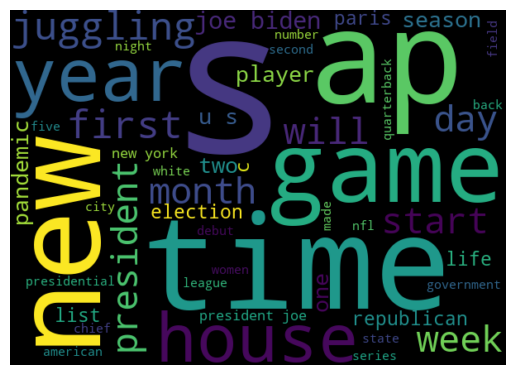

In [365]:
def get_all_words(data2plot):
    
    overallWords = ' '

    for entry in data2plot:
        for word in entry:
            overallWords += word + ' '

    return overallWords

wordcloud = WordCloud(width=600, height=430, max_words=50).generate(get_all_words(data))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Now, let's look at wordclouds based on the sentiment! To do this, we split up the data into one list of lists of all positive news articles and one for all negative news articles.

In [366]:
positive_data = [i for indx,i in enumerate(data) if sentiments[indx] == 1]

negative_data = [i for indx,i in enumerate(data) if sentiments[indx] == -1]

<!-- BEGIN QUESTION -->

### Problem 4.3

**Do this!** Create one wordcloud for the postive articles and one for the negative articles, that _intuitivley_ visualizes your results. 
* Use a different `colormap` for each wordcloud (check out the availbale colormaps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)) **and/or** 
* play with the `background_color` (check out the available colors [here](https://matplotlib.org/stable/gallery/color/named_colors.html)).
* Add appropriate titles to your subplots. 

> **Hint**: Follow the example above and use `get_all_words()`.

> **[🐍 Python Feature 🐍]**: We can create figures with **multiple plots** using `plt.subplot`. The first number indicates the number of rows, the second input is the number of columns and the third is the plot you want to fill next. Like if you want to plot into the lower right corner of a figure with four plots in a 2x2 grid, then you would use `plt.subplot(224)` 

*Note: this question is graded on style/design choices of your visualization and not just on correctness alone.*

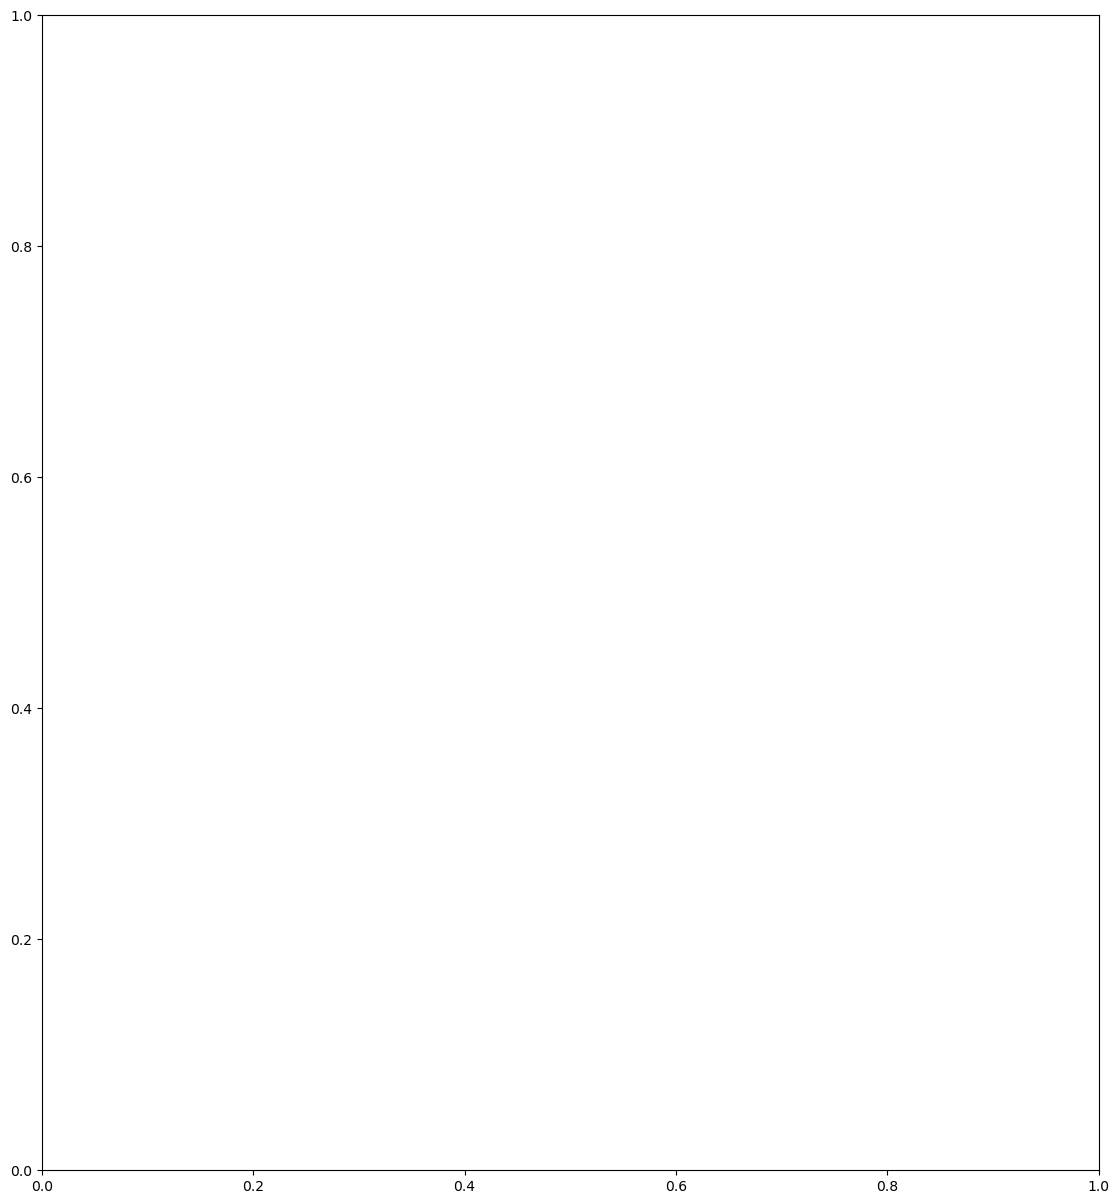

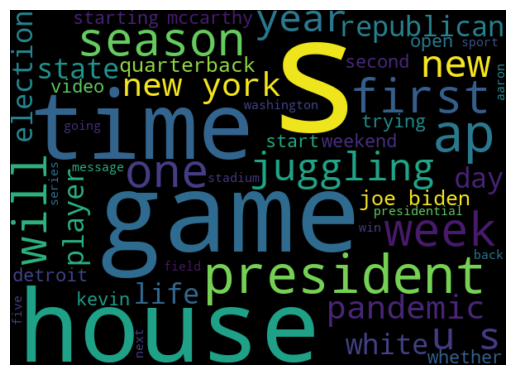

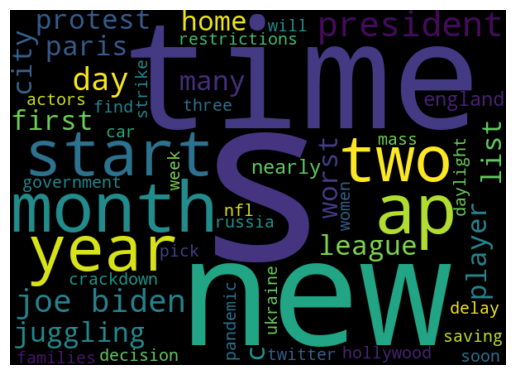

In [367]:
plt.figure(figsize=(30,15))
plt.subplot(121)


wordcloud = WordCloud(width=600, height=430, max_words=50).generate(get_all_words(positive_data))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")



wordcloud2 = WordCloud(width=600, height=430, max_words=50).generate(get_all_words(negative_data))

plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 4.4

**Do this!** Create a line plot visualizing the sentiment on your chose topic over time. 
* First, sort the data in increasing order based on the dates the articles were published. These dates are stored in [Unix time](https://en.wikipedia.org/wiki/Unix_time). 
> **Hint**: Recall `hw0`, where we used a lambda function to retrieve values from a dictionary.
* Next, group the sorted data into `k` bins. Choose `k` to be an appropriate value, so that 100 divides nicely by `k`. The first bin should contain the earliest `100/k` articles, while the `kth` bin should contain the most recent `100/k` articles. 
* Finally, for each bin, compute the fraction of positive news articles using the respective sentiment labels, as well as average date of publishing. Then, `fracs_pos` should contain the fraction of positive news articles for each bin, and `times` should contain the average date of publishing for each bin.
> **Hint**: Because our dates are encoded in Unix time, we can compute the average date of publishing for a bin by averaging together the publishing dates for each article in the bin! 


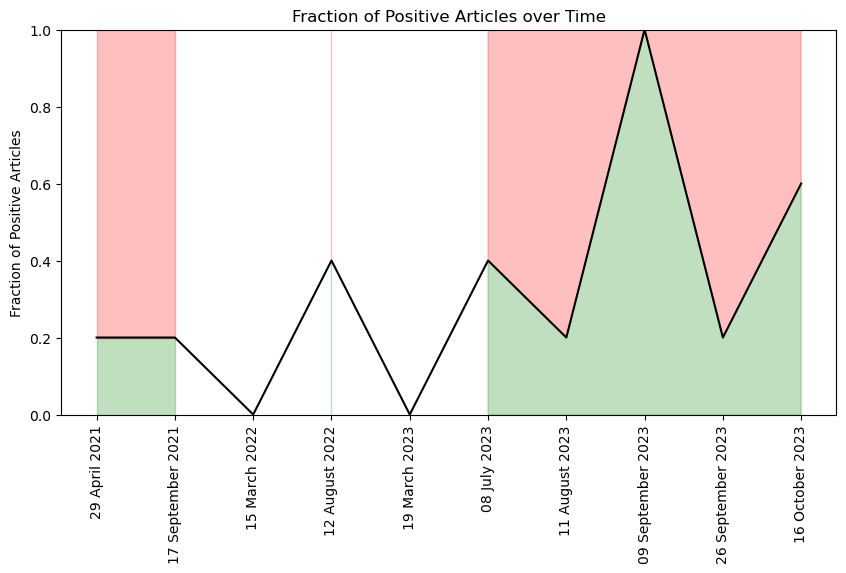

In [368]:
full_data = zip(data, sentiment_labels, dates)


k = 10


fracs_pos = []
average_dates = []


full_data = sorted(full_data, key=lambda x: x[2])


bin_size = len(full_data) // k

for i in range(k):
    start_idx = i * bin_size
    end_idx = (i + 1) * bin_size if i < k - 1 else len(full_data)
    bin_data = full_data[start_idx:end_idx]


    frac_positive = sum(sentiment for _, sentiment, _ in bin_data) / len(bin_data)
    fracs_pos.append(frac_positive)

    date_values = [float(date) for _, _, date in bin_data]

    
    avg_date = np.mean(date_values)
    average_dates.append(avg_date)

average_dates = [datetime.datetime.fromtimestamp(d / 1000).strftime("%d %B %Y") for d in average_dates]


plt.figure(figsize=(10, 5))
plt.plot(range(k), fracs_pos, c='black')
plt.xticks(range(k), average_dates, rotation=90)
plt.ylabel('Fraction of Positive Articles')
plt.title('Fraction of Positive Articles over Time')
plt.ylim(0, 1)
plt.fill_between(range(k), 1, fracs_pos, where=fracs_pos, color='red', alpha=0.25)
plt.fill_between(range(k), 0, fracs_pos, where=fracs_pos, color='green', alpha=0.25)

plt.show()
 



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 5. Summarize your Findings

### Problem 5.1

**Write up!** The visualizations reveal a lot of information about your news data. Describe your basic findings by answering the following questions:

- What was the overall sentiment? 
- What were some of the most/least frequent words that were used (larger = more common)? 
- Why do you think this is? 
- Do you believe this would be different during different weeks?
- How do the words used and their frequency differ for positive versus negative sentiments?

The overall sentiment was mixed. It was very volatile. Some days had entirley bad sentiments while other days had only positive senitments. The most common words included "data", "information" and "state". This is likely because these words are often essential in describing data science related news. These words have no sentiment attached to it, so they will appear in positive and negative articles. However, the negative data did have words like "breach" which could be viewed as exclusively negative. The postive word map had the word census, which could indicate data being gathered to produce socioeconomic data and trends, which would generally be a positive thing. During different weeks, the sentiment scores could be vastly different. Positive uses are always being created for data science. Such news could increase sentiment. However, during particularly negative events, such as hackings and data breaches, sentiments could be more negative. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 5.2

**Write up!** Elaborate on one specific thing or insight from your analysis that you find particularly interesing. 

I learned that sentiment can be very volatile. It is largely affected by day to day ocurrences, especially with words that are not inherently positive or negative, such as "Data Science." It is very noticeable that the sentiment responds heavily to recent news. When I switched the words to "Hamas" and "Israel," the sentiment was almost EXCLUSIVELY negative due to recent occurences. 

### Submission instructions
* **Save your notebook**, then run the cell below to double-check your work. 
* Upload the `.ipynb` notebook directly to Gradescope. 

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [288]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q2c results: All test cases passed!

q3b results: All test cases passed!